In [1]:
# faceMask and faceMask2 hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 22/03/21

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.3
0.6.0


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data1 = hddm.load_csv('faceMask_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data1 = hddm.utils.flip_errors(data1)

# check dataset
data1.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,gc2le9xecjp1stz,0,3,angry,0,_faces/22_F_R_U.jpg,22_F_R_U,22,F,surprised,upper,0,-4.636150,0,0,0,0,0,50
1,gc2le9xecjp1stz,0,3,angry,1,_faces/07_M_H_L.jpg,07_M_H_L,7,M,happy,lower,0,-2.079460,0,0,0,50,0,0
2,gc2le9xecjp1stz,0,3,angry,2,_faces/46_M_R_X.jpg,46_M_R_X,46,M,surprised,baseline,0,-1.847670,0,0,0,0,0,100
3,gc2le9xecjp1stz,0,3,angry,3,_faces/47_M_S_L.jpg,47_M_S_L,47,M,sad,lower,0,-6.506275,0,0,0,0,50,0
4,gc2le9xecjp1stz,0,3,angry,4,_faces/25_M_R_X.jpg,25_M_R_X,25,M,surprised,baseline,0,-1.536780,0,0,0,0,0,100
5,gc2le9xecjp1stz,0,3,angry,5,_faces/27_F_A_U.jpg,27_F_A_U,27,F,angry,upper,1,1.906175,50,0,0,0,0,0
6,gc2le9xecjp1stz,0,3,angry,6,_faces/08_F_S_U.jpg,08_F_S_U,8,F,sad,upper,0,-2.182530,0,0,0,0,50,0
7,gc2le9xecjp1stz,0,3,angry,7,_faces/38_M_H_X.jpg,38_M_H_X,38,M,happy,baseline,0,-1.445230,0,0,0,100,0,0
8,gc2le9xecjp1stz,0,3,angry,8,_faces/30_M_A_U.jpg,30_M_A_U,30,M,angry,upper,1,1.405270,50,0,0,0,0,0
9,gc2le9xecjp1stz,0,3,angry,9,_faces/04_F_R_U.jpg,04_F_R_U,4,F,surprised,upper,0,-1.945385,0,0,0,0,0,50


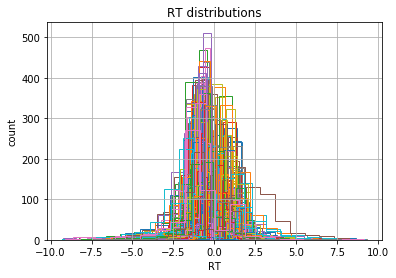

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data1.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (disgusted) and facial expression (angry)
dd1_data = data1.loc[(data1['emotionRating'] == 'disgusted') & (data1['expression'] == 'disgusted')]
dd1_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
429,gc2le9xecjp1stz,4,5,disgusted,434,_faces/28_M_D_X.jpg,28_M_D_X,28,M,disgusted,baseline,1,1.147405,0,100,0,0,0,0
432,gc2le9xecjp1stz,4,5,disgusted,437,_faces/10_M_D_X.jpg,10_M_D_X,10,M,disgusted,baseline,0,-1.075980,0,100,0,0,0,0
474,gc2le9xecjp1stz,4,5,disgusted,479,_faces/26_F_D_L.jpg,26_F_D_L,26,F,disgusted,lower,0,-0.764125,0,50,0,0,0,0
476,gc2le9xecjp1stz,4,5,disgusted,481,_faces/08_F_D_X.jpg,08_F_D_X,8,F,disgusted,baseline,1,0.972135,0,100,0,0,0,0
482,gc2le9xecjp1stz,4,5,disgusted,487,_faces/08_F_D_U.jpg,08_F_D_U,8,F,disgusted,upper,0,-1.228070,0,50,0,0,0,0
483,gc2le9xecjp1stz,4,5,disgusted,488,_faces/57_F_D_X.jpg,57_F_D_X,57,F,disgusted,baseline,1,0.887050,0,100,0,0,0,0
491,gc2le9xecjp1stz,4,5,disgusted,497,_faces/47_M_D_U.jpg,47_M_D_U,47,M,disgusted,upper,0,-1.085485,0,50,0,0,0,0
492,gc2le9xecjp1stz,4,5,disgusted,498,_faces/47_M_D_X.jpg,47_M_D_X,47,M,disgusted,baseline,0,-0.970315,0,100,0,0,0,0
493,gc2le9xecjp1stz,4,5,disgusted,499,_faces/47_M_D_L.jpg,47_M_D_L,47,M,disgusted,lower,0,-1.145565,0,50,0,0,0,0
501,gc2le9xecjp1stz,4,5,disgusted,507,_faces/10_M_D_L.jpg,10_M_D_L,10,M,disgusted,lower,1,0.590520,0,50,0,0,0,0


In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
dd1_data = dd1_data[(dd1_data.subj_idx != 'ygpcur698h4dcw5') & (dd1_data.subj_idx != 'xb95r55zxl5xgqr')]

In [6]:
# define model
m_dd1 = hddm.HDDMRegressor(dd1_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


In [7]:
# run model
m_dd1.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_dd1.save('hddm_dd1')

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 40532.3 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

TypeError: write() argument must be str, not bytes

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                        mean         std        2.5q        25q         50q        75q      97.5q       mc err
a                                     1.7531   0.0425648     1.67062    1.72438     1.75273    1.78088    1.83634  0.000997062
a_std                               0.553106   0.0369132    0.485365   0.526626    0.551781   0.577573   0.628785  0.000985596
a_subj.02hcv424u29nd5w               2.08214    0.306122     1.57817     1.8616     2.04745    2.26313    2.76147   0.00900525
a_subj.02k2uwlhgxnumn9               1.74329    0.219561     1.37277    1.58545     1.72423    1.87294    2.24371   0.00568756
a_subj.03g7h2hzq4o3g26               2.52042    0.288066     2.02138    2.31632     2.49977    2.69953     3.1499   0.00722107
a_subj.0nmr75cysk1ae0e               1.92413    0.282888     1.45014     1.7209      1.8978     2.1028     2.5507   0.00811863
a_subj.0t8qp67pqkw36cb               1.73898    0.238549     1.33575    1.57129     1.72129    1.88008    2.275

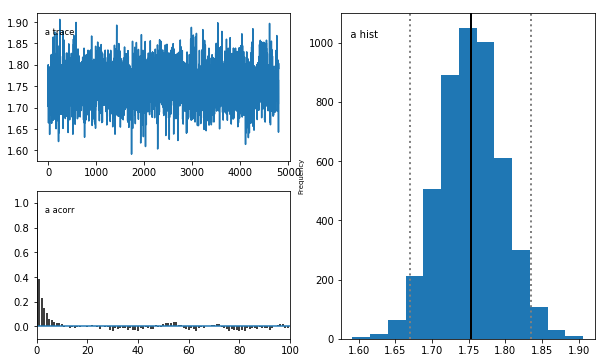

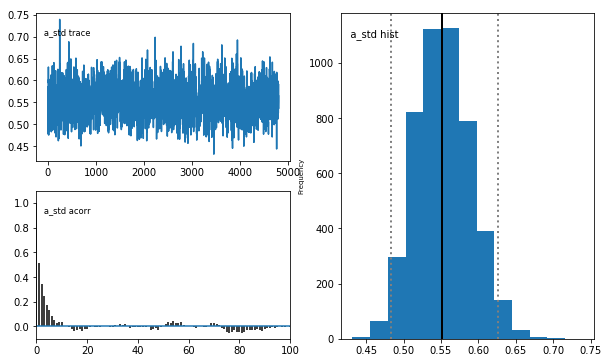

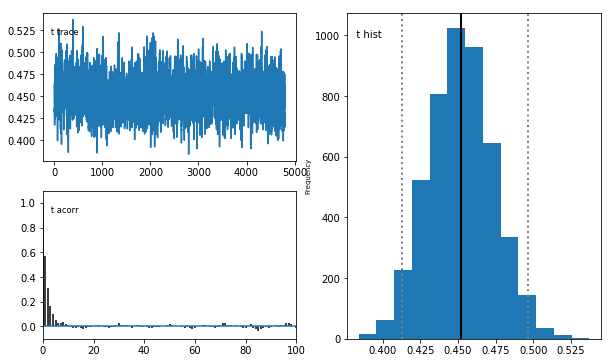

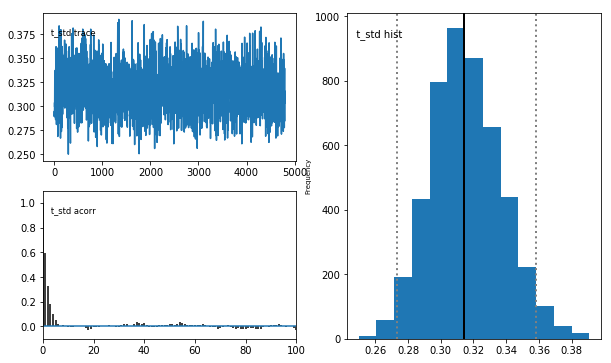

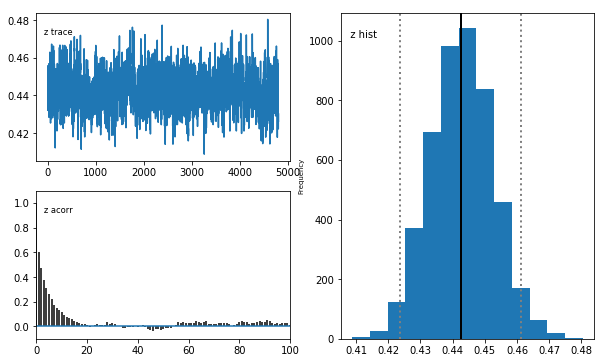

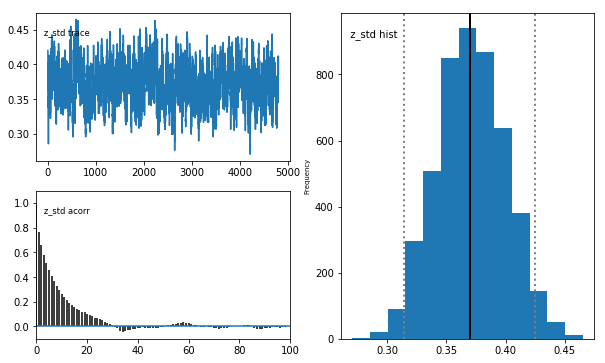

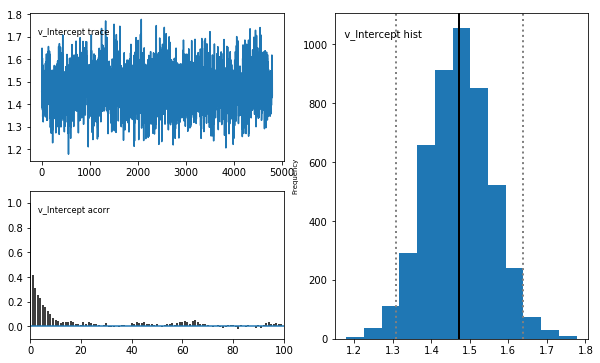

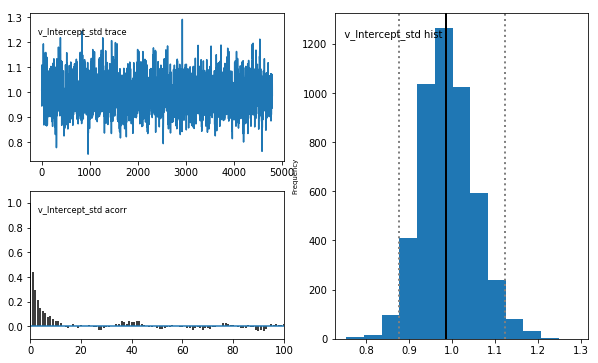

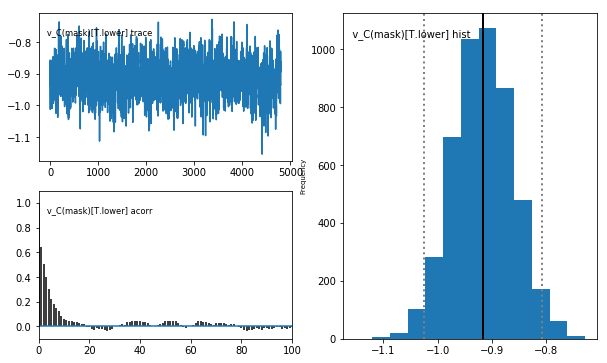

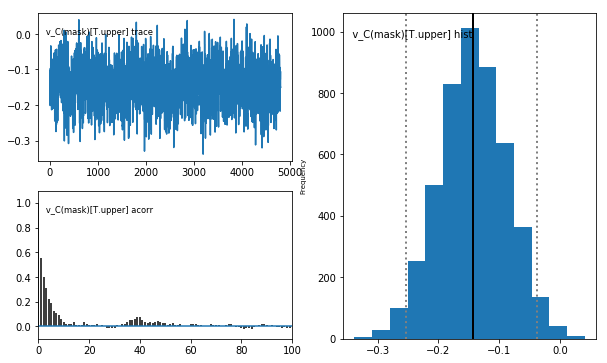

In [8]:
m_dd1.print_stats()
m_dd1.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                      mean        std       2.5q       25q  \
a                                   1.7531  0.0425648    1.67062   1.72438   
a_std                             0.553106  0.0369132   0.485365  0.526626   
a_subj.02hcv424u29nd5w             2.08214   0.306122    1.57817    1.8616   
a_subj.02k2uwlhgxnumn9             1.74329   0.219561    1.37277   1.58545   
a_subj.03g7h2hzq4o3g26             2.52042   0.288066    2.02138   2.31632   
a_subj.0nmr75cysk1ae0e             1.92413   0.282888    1.45014    1.7209   
a_subj.0t8qp67pqkw36cb             1.73898   0.238549    1.33575   1.57129   
a_subj.0vfpn4uf3t031qu             1.50946   0.201846    1.16548   1.36447   
a_subj.11dsfdtym1yy5mx              1.3773   0.160857    1.09059   1.26565   
a_subj.1d3dadyu4ekqb4q             1.42523   0.190459    1.10351   1.29066   
a_subj.1mt2emp4645cbl1             2.05957   0.248153    1.63684   1.88135   
a_subj.1rst24mbtgy9rc8             1.64519   0.219407    1.27752

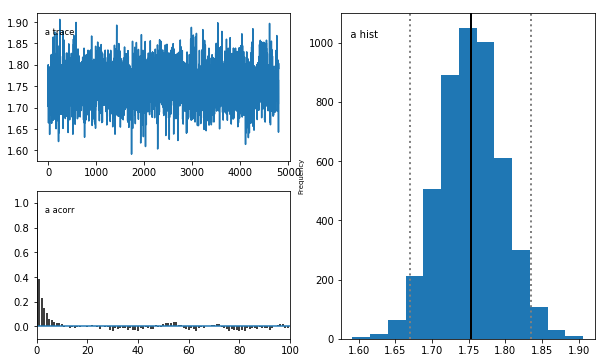

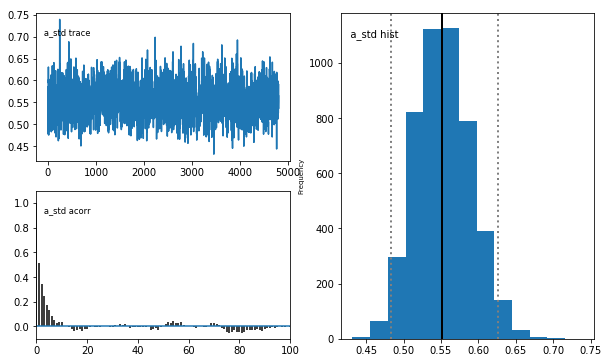

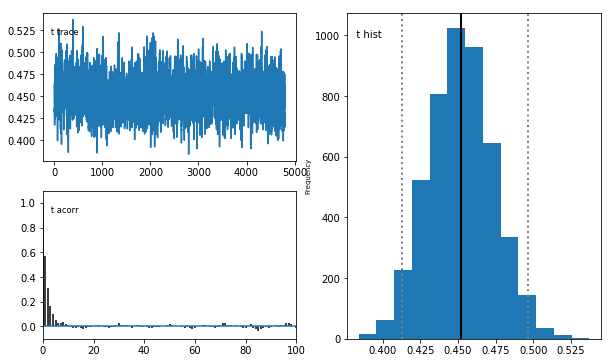

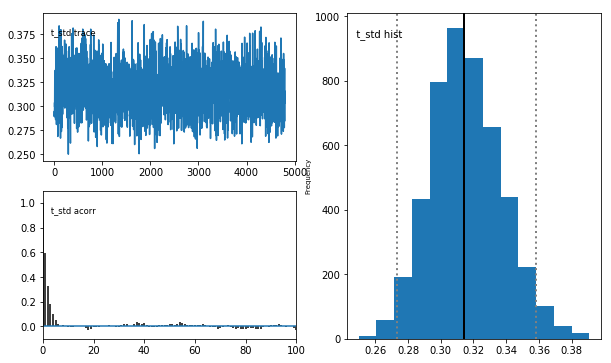

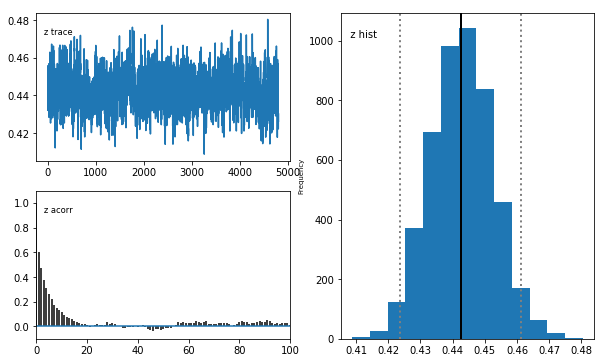

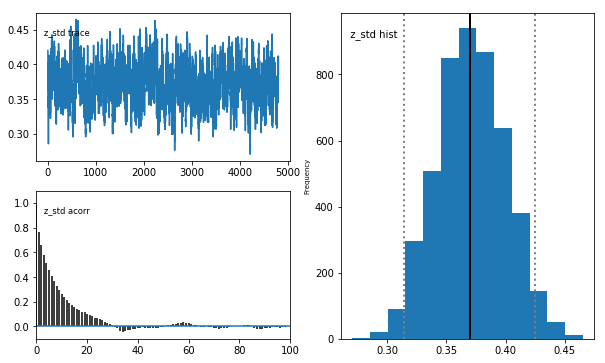

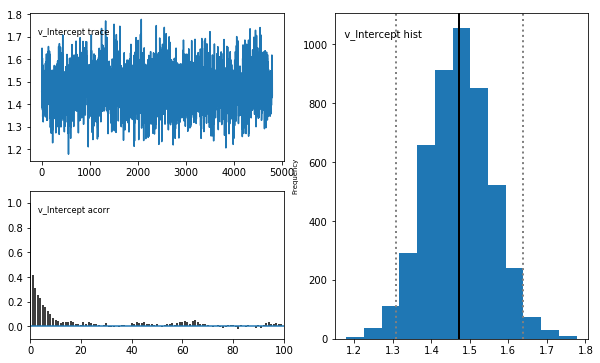

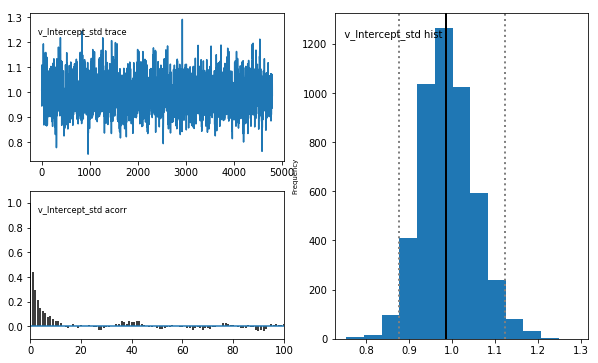

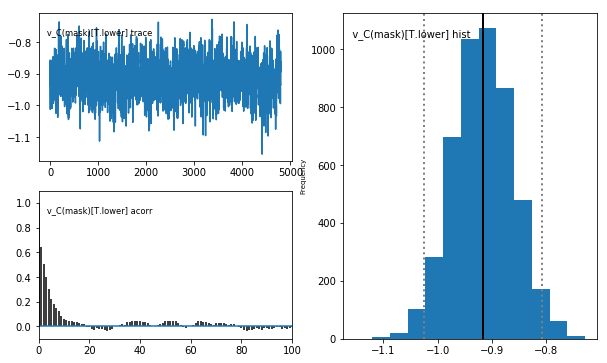

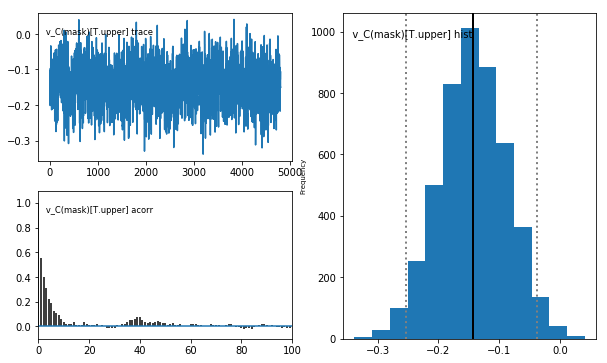

In [9]:
# save model stats
dd1_stats = m_dd1.gen_stats()
print(dd1_stats)
dd1_stats.to_csv('dd1_5000/faceMask_hddm_drift_maskFalseNegatives_dd1_5000.csv', index=True)

# save model posterior plots
m_dd1.plot_posteriors(path='dd1_5000/_posteriors', save=True)

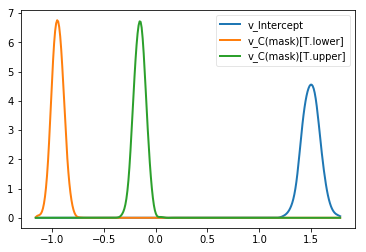

In [10]:
# plot model posteriors by mask
dd1_v_none, dd1_v_lower, dd1_v_upper = m_dd1.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([dd1_v_none, dd1_v_lower, dd1_v_upper])
plt.savefig('dd1_5000/faceMask_hddm_drift_maskFalsePositives_dd1_5000_v_mask.pdf')

In [12]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(dd1_v_none < 0) = ", (dd1_v_none.trace() < 0).mean())
print("P(dd1_v_lower > 0) = ", (dd1_v_lower.trace() > 0).mean())
print("P(dd1_v_upper > 0) = ", (dd1_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(dd1_v_lower > dd1_v_upper) = ", (dd1_v_lower.trace() > dd1_v_upper.trace()).mean())

P(dd1_v_none < 0) =  0.0
P(dd1_v_lower > 0) =  0.0
P(dd1_v_upper > 0) =  0.00375
P(dd1_v_lower > dd1_v_upper) =  0.0


In [13]:
# load hDDM-processed data from CSV file into a NumPy structured array
data2 = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data2 = hddm.utils.flip_errors(data2)

# check dataset
data2.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,lbmmswtrr0mpvov,0,3,surprised,0,_faces/HM08_F_X.jpg,HM08_F_X,HM08,H,M,fearful,baseline,1,2.248290,0,0,100,0,0,0
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
2,lbmmswtrr0mpvov,0,3,surprised,2,_faces/WF05_S_X.jpg,WF05_S_X,WF05,W,F,sad,baseline,0,-1.093135,0,0,0,0,100,0
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
4,lbmmswtrr0mpvov,0,3,surprised,4,_faces/BF10_D_X.jpg,BF10_D_X,BF10,B,F,disgusted,baseline,0,-1.586875,0,100,0,0,0,0
5,lbmmswtrr0mpvov,0,3,surprised,5,_faces/BF15_F_L.jpg,BF15_F_L,BF15,B,F,fearful,lower,1,1.020070,0,0,50,0,0,0
6,lbmmswtrr0mpvov,0,3,surprised,6,_faces/AM07_S_X.jpg,AM07_S_X,AM07,A,M,sad,baseline,0,-1.092280,0,0,0,0,100,0
7,lbmmswtrr0mpvov,0,3,surprised,7,_faces/BF10_D_L.jpg,BF10_D_L,BF10,B,F,disgusted,lower,0,-1.574250,0,50,0,0,0,0
8,lbmmswtrr0mpvov,0,3,surprised,8,_faces/AM07_S_U.jpg,AM07_S_U,AM07,A,M,sad,upper,0,-1.219265,0,0,0,0,50,0
9,lbmmswtrr0mpvov,0,3,surprised,9,_faces/BM16_H_U.jpg,BM16_H_U,BM16,B,M,happy,upper,0,-1.092995,0,0,0,50,0,0


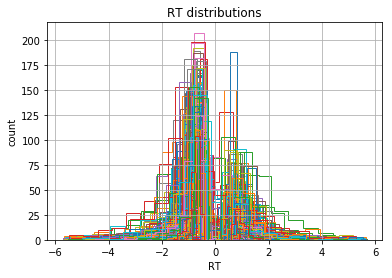

In [14]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data2.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [15]:
# subset dataset by emotion rating type (disgusted) and facial expression (angry)
dd2_data = data2.loc[(data2['emotionRating'] == 'disgusted') & (data2['expression'] == 'disgusted')]
dd2_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
168,lbmmswtrr0mpvov,3,5,disgusted,169,_faces/WF05_D_X.jpg,WF05_D_X,WF05,W,F,disgusted,baseline,1,1.753920,0,100,0,0,0,0
172,lbmmswtrr0mpvov,3,5,disgusted,173,_faces/HF04_D_U.jpg,HF04_D_U,HF04,H,F,disgusted,upper,0,-0.932020,0,50,0,0,0,0
174,lbmmswtrr0mpvov,3,5,disgusted,175,_faces/WF05_D_L.jpg,WF05_D_L,WF05,W,F,disgusted,lower,1,1.042840,0,50,0,0,0,0
178,lbmmswtrr0mpvov,3,5,disgusted,179,_faces/AM07_D_L.jpg,AM07_D_L,AM07,A,M,disgusted,lower,0,-1.147580,0,50,0,0,0,0
180,lbmmswtrr0mpvov,3,5,disgusted,181,_faces/HF04_D_X.jpg,HF04_D_X,HF04,H,F,disgusted,baseline,1,1.161815,0,100,0,0,0,0
182,lbmmswtrr0mpvov,3,5,disgusted,183,_faces/AM07_D_X.jpg,AM07_D_X,AM07,A,M,disgusted,baseline,1,1.260355,0,100,0,0,0,0
185,lbmmswtrr0mpvov,3,5,disgusted,186,_faces/WF05_D_U.jpg,WF05_D_U,WF05,W,F,disgusted,upper,1,1.044640,0,50,0,0,0,0
205,lbmmswtrr0mpvov,3,5,disgusted,206,_faces/HF04_D_L.jpg,HF04_D_L,HF04,H,F,disgusted,lower,0,-0.900665,0,50,0,0,0,0
390,mr81dhy9r5lxu8r,1,6,disgusted,68,_faces/BM17_D_L.jpg,BM17_D_L,BM17,B,M,disgusted,lower,0,-1.023000,0,50,0,0,0,0
395,mr81dhy9r5lxu8r,1,6,disgusted,73,_faces/AM04_D_U.jpg,AM04_D_U,AM04,A,M,disgusted,upper,0,-1.134000,0,50,0,0,0,0


In [16]:
# drop any subjects missing columns in design matrix (otherwise produces error)
dd2_data = dd2_data[(dd2_data.subj_idx != 'hdn2l3df216jykn')]

In [17]:
# define model
m_dd2 = hddm.HDDMRegressor(dd2_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 52629.9 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean         std       2.5q         25q        50q        75q        97.5q       mc err
a                                   1.50973   0.0329602    1.44751     1.48705    1.50877    1.53199      1.57546  0.000965013
a_std                              0.418067   0.0310359   0.358364    0.396358   0.417206    0.43882     0.480957    0.0012159
a_subj.09coqg8hlpux6fe              1.31017    0.209325   0.954766     1.16527    1.29078    1.43797      1.78698   0.00444204
a_subj.0b3t2skj9mlhbkn              1.40469    0.261203   0.984857     1.21911    1.37375    1.56411      2.01106   0.00646961
a_subj.0bcg7mtj2n1jjw9              2.72957    0.369502    2.09675     2.46726    2.71378    2.96947      3.50859   0.00712806
a_subj.0s53r30oouek89b              2.53378    0.331976     1.9512     2.30844    2.50457    2.73133      3.28406   0.00694958
a_subj.0uj9gbhag3o1w1v              1.56387    0.265404    1.11977     1.36996    1.53745    1.72987      2.156

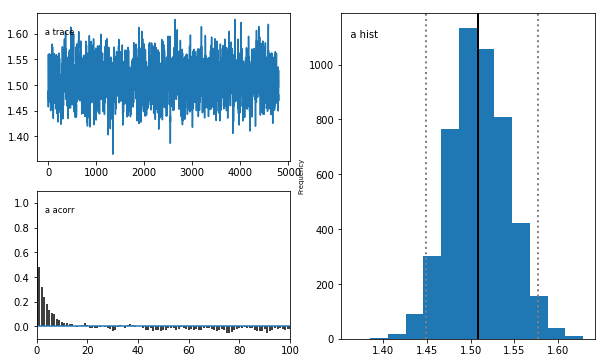

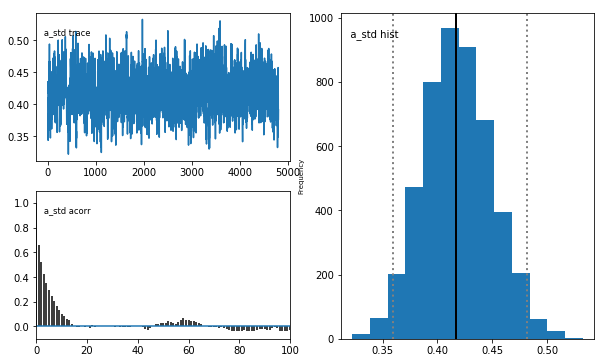

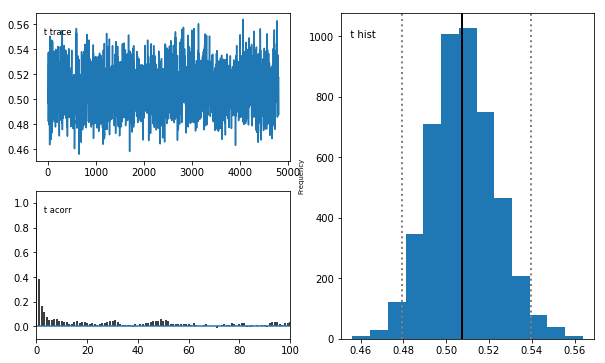

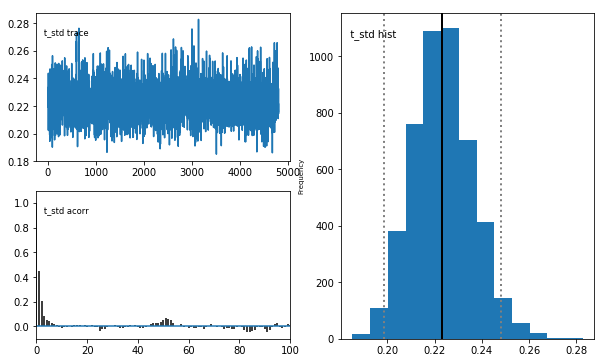

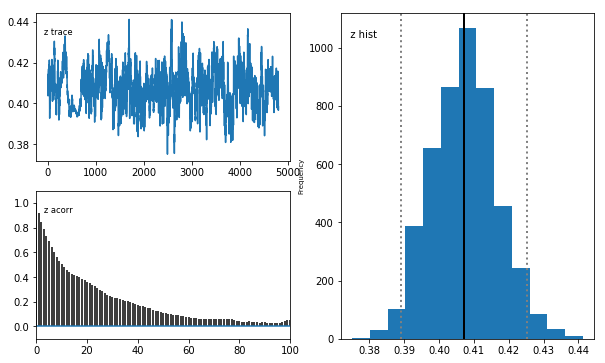

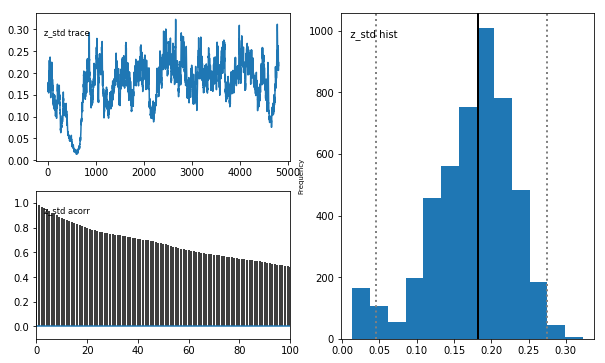

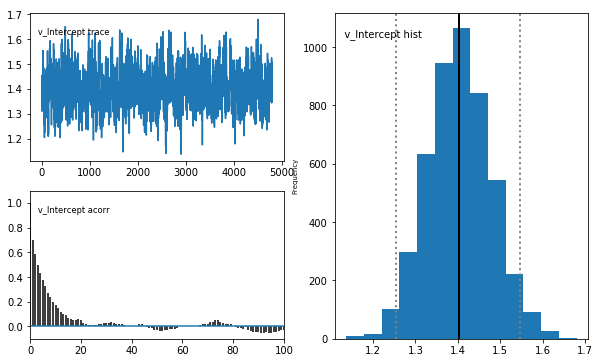

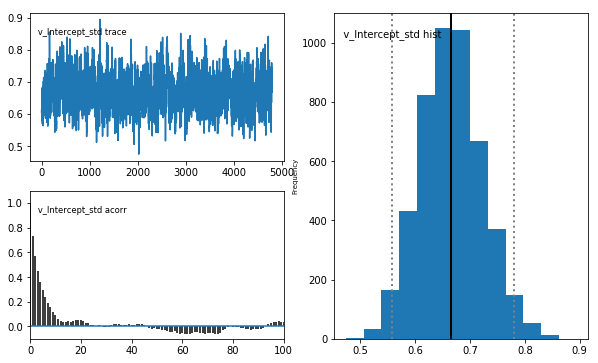

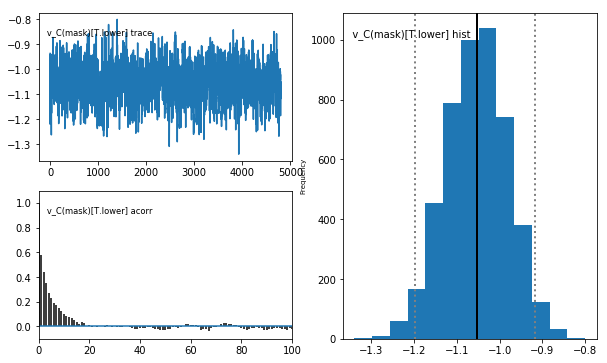

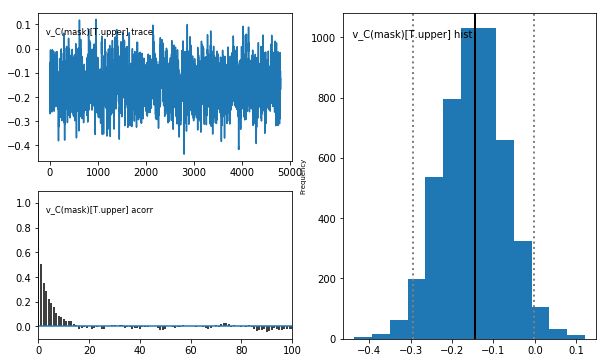

In [18]:
# run model
m_dd2.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_dd2.print_stats()
m_dd2.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                      mean        std       2.5q        25q  \
a                                  1.50973  0.0329602    1.44751    1.48705   
a_std                             0.418067  0.0310359   0.358364   0.396358   
a_subj.09coqg8hlpux6fe             1.31017   0.209325   0.954766    1.16527   
a_subj.0b3t2skj9mlhbkn             1.40469   0.261203   0.984857    1.21911   
a_subj.0bcg7mtj2n1jjw9             2.72957   0.369502    2.09675    2.46726   
a_subj.0s53r30oouek89b             2.53378   0.331976     1.9512    2.30844   
a_subj.0uj9gbhag3o1w1v             1.56387   0.265404    1.11977    1.36996   
a_subj.17nzn4k8r1qkmrn              1.5465   0.228686    1.15406    1.38852   
a_subj.1fdkw2qjx3hc3lk              1.7795   0.244547    1.36109    1.61038   
a_subj.1mla0dmotqefnav             1.96061   0.255573    1.52032    1.77861   
a_subj.23hr9tl84h3zhw3             1.58408   0.236449    1.17977    1.41555   
a_subj.27muqwvalwne26r             1.75346   0.26459

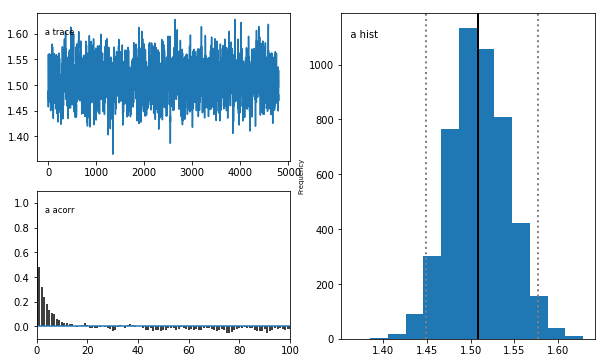

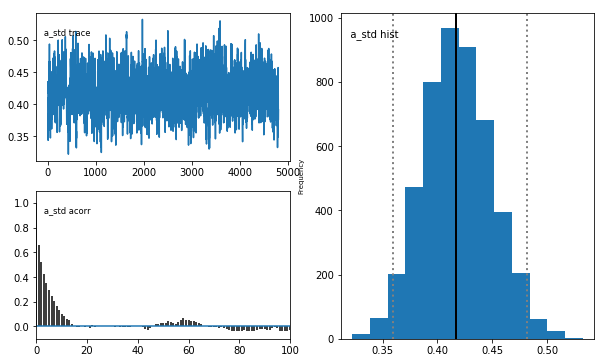

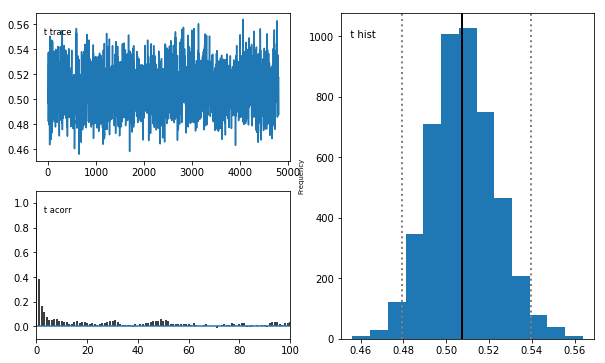

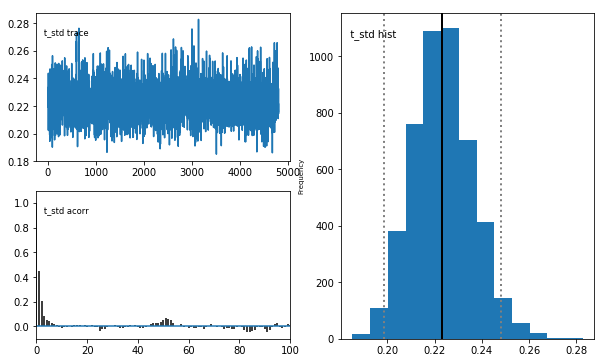

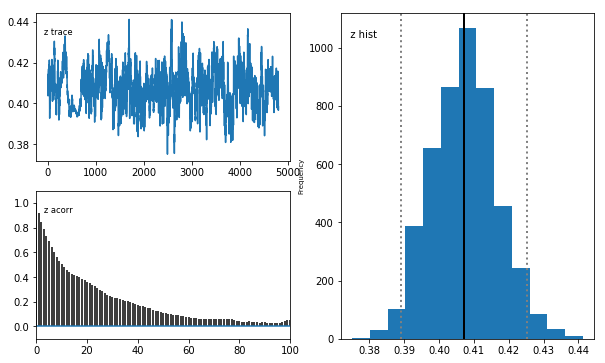

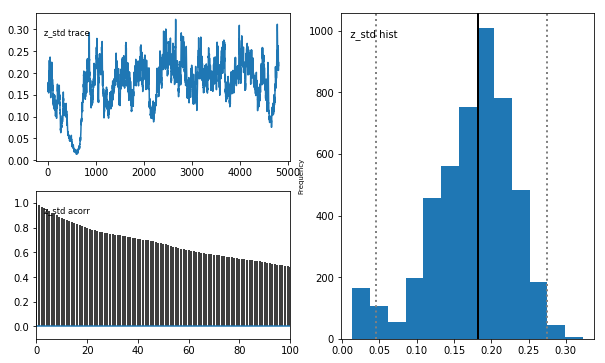

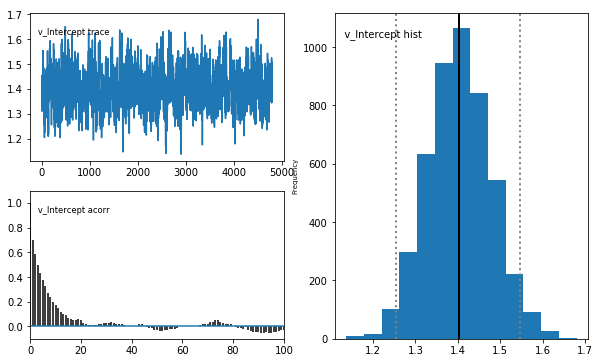

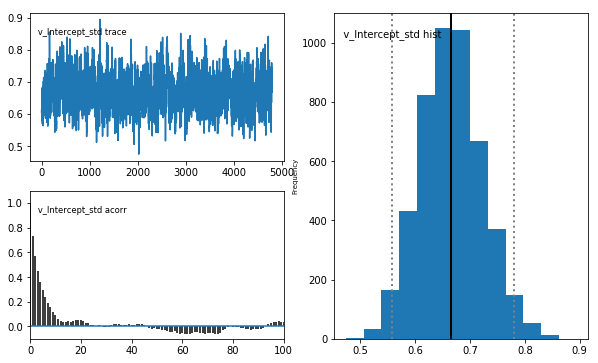

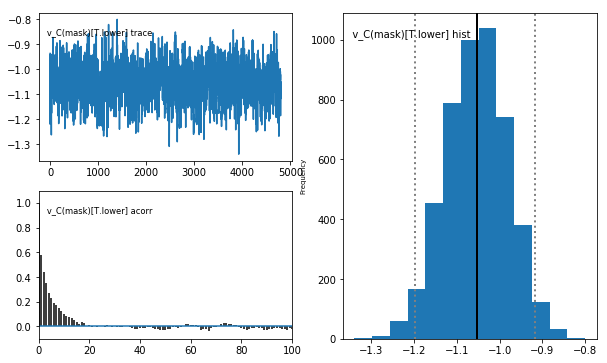

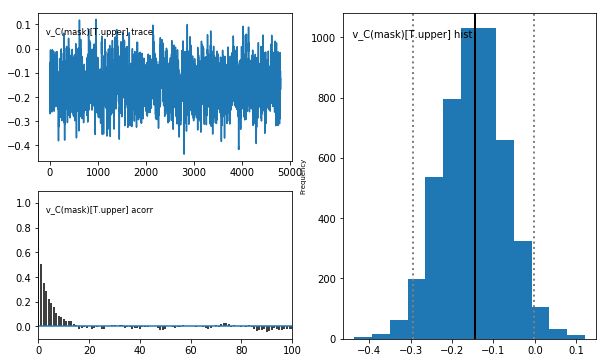

In [26]:
# save model stats
dd2_stats = m_dd2.gen_stats()
print(dd2_stats)
dd2_stats.to_csv('dd2_5000/faceMask2_hddm_drift_maskFalseNegatives_dd2_5000.csv', index=True)

# save model posterior plots
m_dd2.plot_posteriors(path='dd2_5000/_posteriors', save=True)

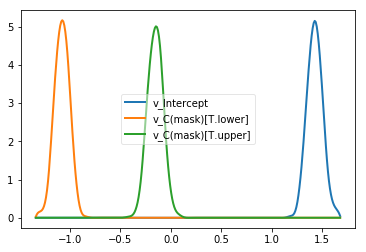

In [27]:
# plot model posteriors by mask
dd2_v_none, dd2_v_lower, dd2_v_upper = m_dd2.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([dd2_v_none, dd2_v_lower, dd2_v_upper])
plt.savefig('dd2_5000/faceMask2_hddm_drift_maskFalsePositives_dd2_5000_v_mask.pdf')

In [22]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(dd2_v_none < 0) = ", (dd2_v_none.trace() < 0).mean())
print("P(dd2_v_lower > 0) = ", (dd2_v_lower.trace() > 0).mean())
print("P(dd2_v_upper > 0) = ", (dd2_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(dd2_v_lower > dd2_v_upper) = ", (dd2_v_lower.trace() > dd2_v_upper.trace()).mean())

P(dd2_v_none < 0) =  0.0
P(dd2_v_lower > 0) =  0.0
P(dd2_v_upper > 0) =  0.0239583333333
P(dd2_v_lower > dd2_v_upper) =  0.0


In [25]:
## estimate probabilities that mask coefficient posteriors differ from each other (faceMask 1 vs. faceMask2)
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(dd1_v_none < dd2_v_none) = ", (dd1_v_none.trace() < dd2_v_none.trace()).mean())
print("P(dd1_v_lower < dd2_v_lower) = ", (dd1_v_lower.trace() < dd2_v_lower.trace()).mean())
print("P(dd1_v_upper < dd2_v_upper) = ", (dd1_v_upper.trace() < dd2_v_upper.trace()).mean())


P(dd1_v_none < dd2_v_none) =  0.276458333333
P(dd1_v_lower < dd2_v_lower) =  0.0635416666667
P(dd1_v_upper < dd2_v_upper) =  0.478541666667


In [34]:
## adding together the relative values:
dd1_v_none_plus_lower = dd1_v_none.trace() + dd1_v_lower.trace()
dd1_v_none_plus_upper = dd1_v_none.trace() + dd1_v_upper.trace()

dd2_v_none_plus_lower = dd2_v_none.trace() + dd2_v_lower.trace()
dd2_v_none_plus_upper = dd2_v_none.trace() + dd2_v_upper.trace()

In [41]:
print("P(dd1_v_none_plus_lower < dd2_v_none_plus_lower) = ", (dd1_v_none_plus_lower < dd2_v_none_plus_lower).mean())
print("P(dd1_v_none_plus_upper < dd2_v_none_plus_upper) = ", (dd1_v_none_plus_upper < dd2_v_none_plus_upper).mean())

P(dd1_v_none_plus_lower < dd2_v_none_plus_lower) =  0.0266666666667
P(dd1_v_none_plus_upper < dd2_v_none_plus_upper) =  0.263958333333
